### Boom Bikes Analysis

#### Problem Statement

BoomBikes is a US-based bike-sharing provider and the company has seen a drastic decline  in it's revenue after COVID-19 . The company is aiming to increase it's revenue post pandemic by predicting the demand of sharing bikes.

BoomBikes have approached a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score
from statsmodels.tools import categorical

import scipy.stats as stats
from sklearn.metrics import mean_absolute_error, mean_squared_error


### Load the Dataset

In [81]:
df = pd.read_csv("day.csv")
print('Data loaded successfully')
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')

Data loaded successfully
The dataset contains 730 rows and 16 columns.


### Inspect the data
### Checking the first few rows, data types, and basic statistics of the dataset

In [82]:
print(df.head())


   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [83]:
print(df.tail())

     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
725      726  27-12-2019       1   1    12        0        4           1   
726      727  28-12-2019       1   1    12        0        5           1   
727      728  29-12-2019       1   1    12        0        6           0   
728      729  30-12-2019       1   1    12        0        0           0   
729      730  31-12-2019       1   1    12        0        1           1   

     weathersit       temp     atemp      hum  windspeed  casual  registered  \
725           2  10.420847  11.33210  65.2917  23.458911     247        1867   
726           2  10.386653  12.75230  59.0000  10.416557     644        2451   
727           2  10.386653  12.12000  75.2917   8.333661     159        1182   
728           1  10.489153  11.58500  48.3333  23.500518     364        1432   
729           2   8.849153  11.17435  57.7500  10.374682     439        2290   

      cnt  
725  2114  
726  3095  
727  1341  
728  1796  
72

In [84]:
print(df.describe())


          instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.5448

### Analysis:
#### The dataset contains daily bike rental counts, along with weather and temporal data.
#### From the 'describe' output, it appears there are no obvious missing values or anomalies.

### Drop the 'instant' column as it is not required for analysis

In [85]:
df.drop(columns=['instant'], inplace=True)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.7+ KB


In [87]:
# Count the total number of missing values in each column
# This helps identify which columns have missing data and sorts them in descending order
df.isnull().sum().sort_values(ascending=False)

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Analysis:
#### No missing values were detected, indicating a clean dataset

### We can rename few columns for better readability

In [88]:
df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   year        730 non-null    int64  
 3   month       730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  humidity    730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.7+ KB


In [90]:
### removing the unwanted columns
df.drop(['casual','registered'],axis=1,inplace=True)

##### Analysis: Columns 'casual' and 'registered' are subsets of 'cnt' (total count), so dropping them avoids data leakage.


### convert the season column values which can be meaningful for interpretation

In [91]:
season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
df['season'] = df['season'].map(season_mapping)

In [92]:
weather_mapping = {
    1: 'Clear/Partly Cloudy',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Light Rain',
    4: 'Heavy Rain/Thunderstorm'
}
df['weathersit'] = df['weathersit'].map(weather_mapping)

### Since we have extracted the values we can now drop the original 'dteday' column

In [93]:
df.drop('dteday', axis=1,inplace=True)

In [94]:
df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

##### Analysis: After these changes the dataset is more understandable

In [95]:
# Understanding how the data is distributed for 'season', 'weathersit' and 'year' column
season_distribution = df['season'].value_counts()
weather_distribution = df['weathersit'].value_counts()
year_distribution = df['year'].value_counts()

print("\nSeason Distribution:")
print(season_distribution)
print("\nWeather Distribution:")
print(weather_distribution)
print("\nYear Distribution:")
print(year_distribution)


Season Distribution:
season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

Weather Distribution:
weathersit
Clear/Partly Cloudy      463
Mist/Cloudy              246
Light Snow/Light Rain     21
Name: count, dtype: int64

Year Distribution:
year
0    365
1    365
Name: count, dtype: int64


In [96]:
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')


The dataset contains 730 rows and 12 columns.


In [97]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Mist/Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Mist/Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear/Partly Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear/Partly Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear/Partly Cloudy,9.305237,11.46350,43.6957,12.522300,1600


### Visualising the data

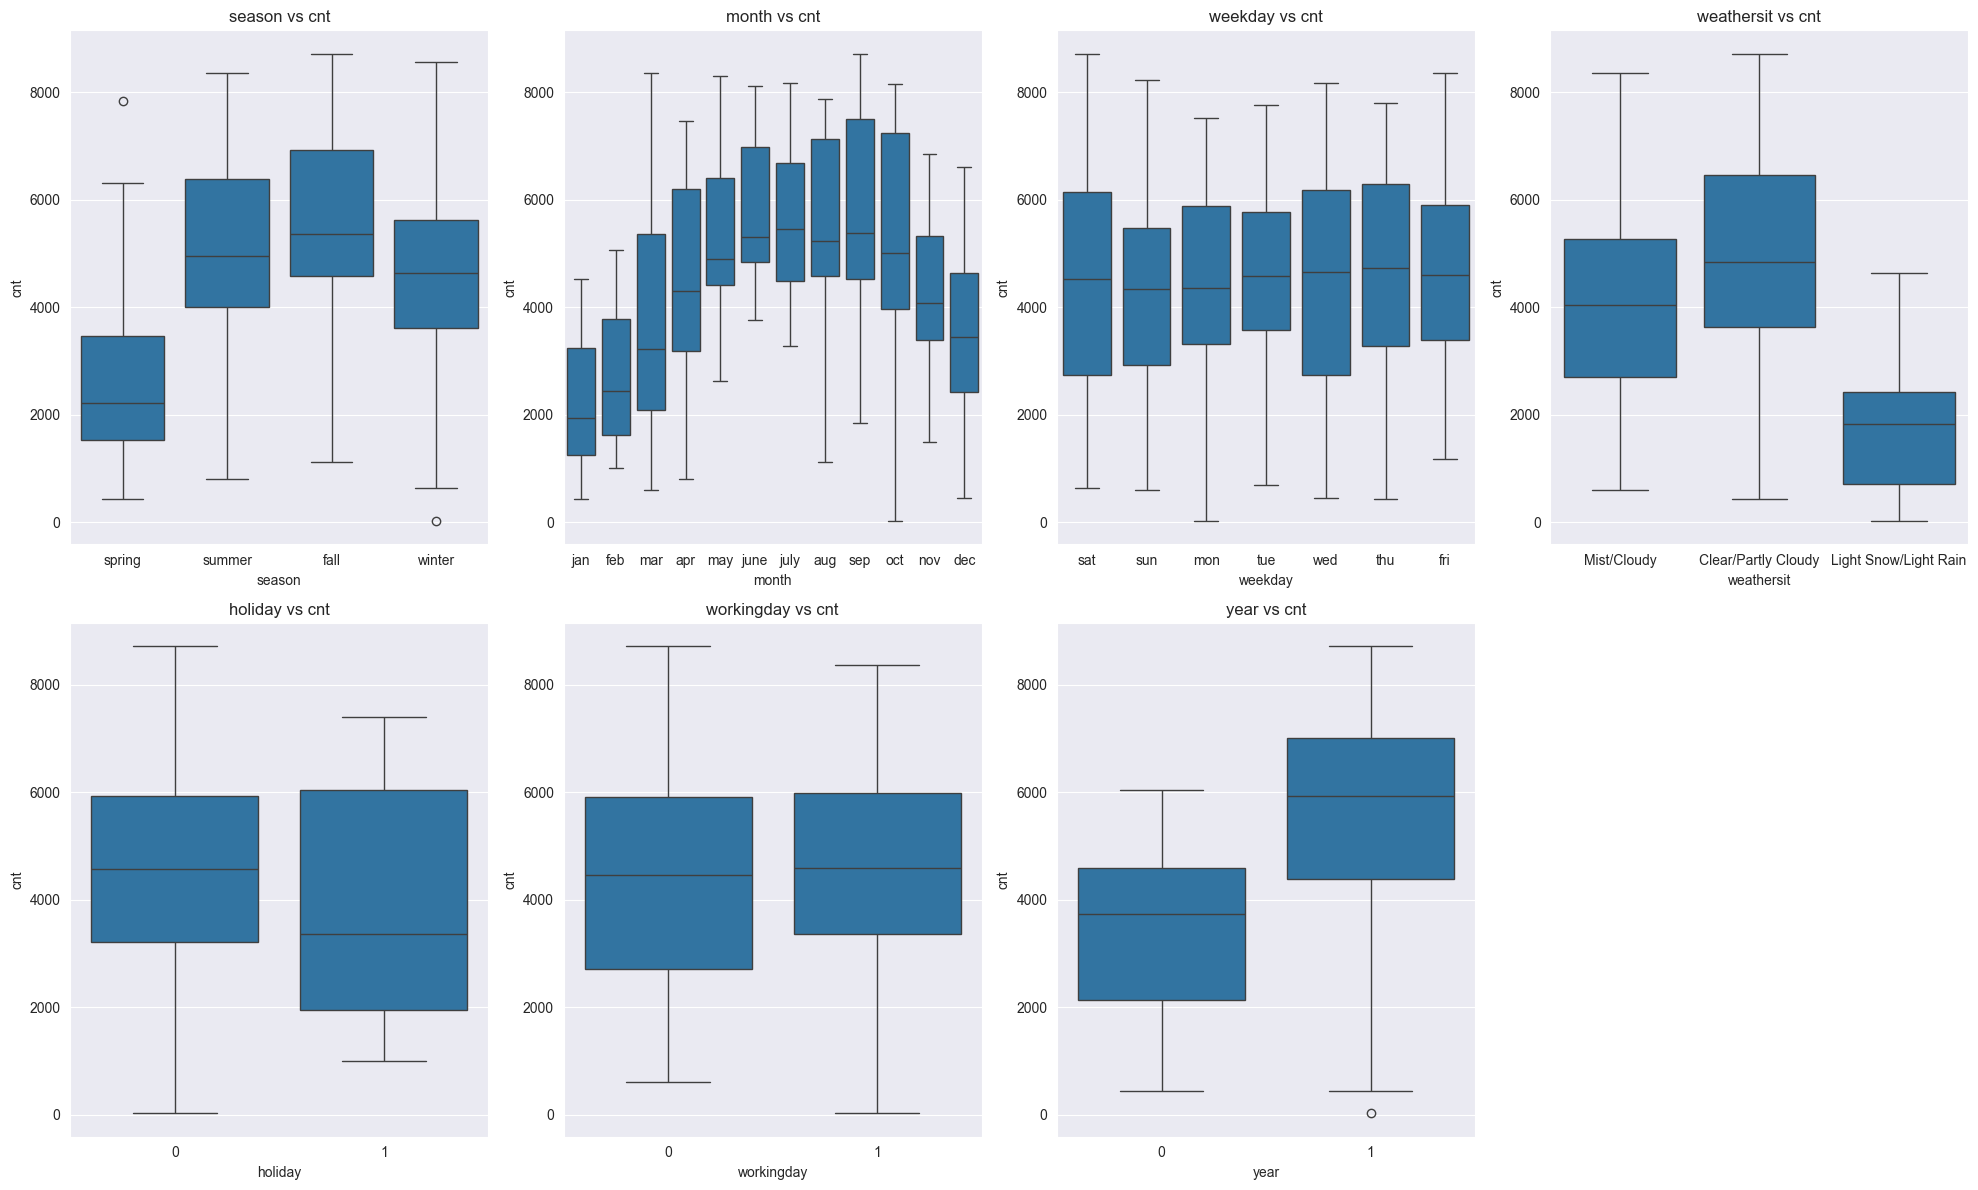

In [98]:
plt.figure(figsize=(20, 12))
features = ['season', 'month', 'weekday', 'weathersit', 'holiday', 'workingday', 'year']
for i, feature in enumerate(features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=feature, y='cnt', data=df)
    plt.title(f'{feature} vs cnt')
plt.tight_layout()
plt.show()


##### Analysis: From the above Box Plots we can interpret the following
- Spring season has less demand
- During Weekends (Sat & Sun) and Holidays there is less demand for Sharing Bikes
- Also when the weather is cloud or clear sky the demand is high

### Finding Outlier

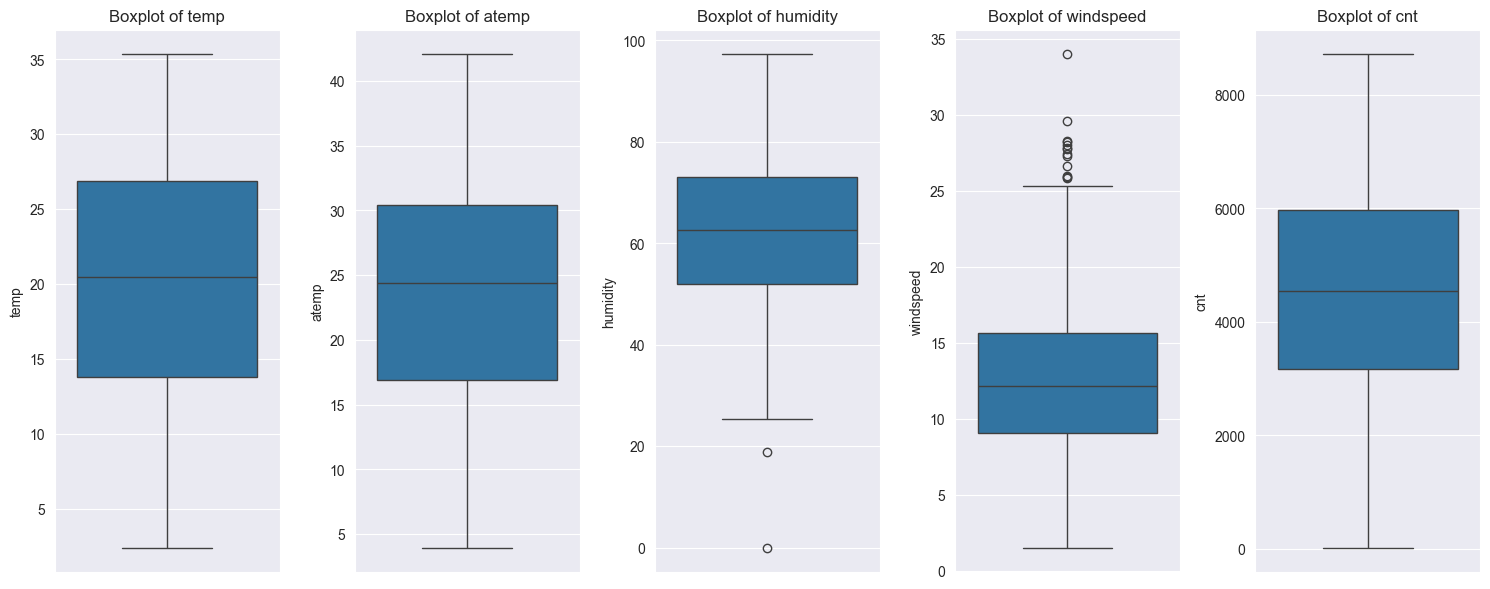

In [99]:
# Boxplot for numerical variables
plt.figure(figsize=(15, 6))
numerical_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'cnt']
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


##### Analysis: It can be observed that there are some visible outliers in windspeed' and 'humidity'


### Removing Outliers

In [100]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal on humidity and windspeed
df = remove_outliers(df, 'humidity')
df = remove_outliers(df, 'windspeed')

print(f"Dataset shape after outlier removal: {df.shape}")


Dataset shape after outlier removal: (716, 12)


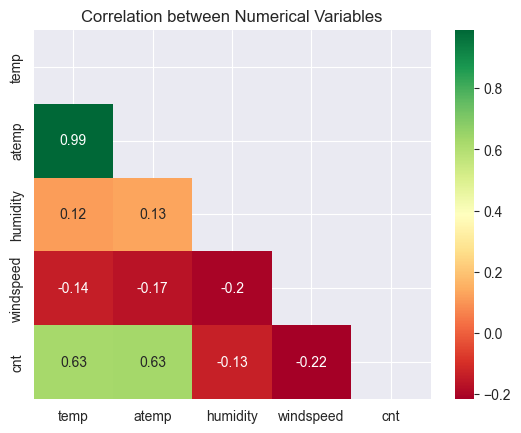

In [101]:
corr_matrix = df[['temp', 'atemp', 'humidity', 'windspeed', 'cnt']].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, cmap="RdYlGn", mask=mask)
plt.title("Correlation between Numerical Variables")
plt.show()

##### Analysis: There is a strong correlation between temp and atemp variables.

### Feature Encoding

In [107]:
### we have these categorical variables season, weathersit, month, weekday.
categorical_variables = ['season', 'weathersit', 'month', 'weekday']
df_encoded = pd.get_dummies(df, columns=categorical_variables, drop_first=True)

print(f'The dataset contains {df_encoded.shape[0]} rows and {df_encoded.shape[1]} columns.')

The dataset contains 716 rows and 30 columns.


##### Analysis: Converted above categorical variables into dummy variables to include in regression models.

### Data Splitting and Scaling

In [108]:
### splitting the dataset into train and test dataset
### Also defining independent and target variables here as X and y

X = df_encoded.drop(columns=['cnt'])
y = df_encoded['cnt']

### now splitting the data sets into training and testing with 70% and 30%
### we are taking random state as 42 because
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'Training dataset {X_train.shape} , Testing Dataset {X_test.shape}')

Training dataset (501, 29) , Testing Dataset (215, 29)


In [109]:
scaler = MinMaxScaler()
number_cols = ['temp', 'atemp', 'humidity', 'windspeed']

X_train[number_cols] = scaler.fit_transform(X_train[number_cols])
X_test[number_cols] = scaler.transform(X_test[number_cols])

print(f'Training dataset {X_train.shape} , Testing Dataset {X_test.shape}')


Training dataset (501, 29) , Testing Dataset (215, 29)


In [110]:
print("Columns in X_train:")
print(X_train.dtypes)


Columns in X_train:
year                                  int64
holiday                               int64
workingday                            int64
temp                                float64
atemp                               float64
humidity                            float64
windspeed                           float64
season_spring                          bool
season_summer                          bool
season_winter                          bool
weathersit_Light Snow/Light Rain       bool
weathersit_Mist/Cloudy                 bool
month_aug                              bool
month_dec                              bool
month_feb                              bool
month_jan                              bool
month_july                             bool
month_june                             bool
month_mar                              bool
month_may                              bool
month_nov                              bool
month_oct                              bool
month_sep   

### Converting all bool values into integer

In [111]:
# Convert boolean columns to integers
bool_cols = X_train.select_dtypes(include=['bool']).columns
X_train[bool_cols] = X_train[bool_cols].astype(int)
X_test[bool_cols] = X_test[bool_cols].astype(int)

print("Converted boolean columns to integers.")


Converted boolean columns to integers.


### Building the first model

In [112]:
# Initialize Linear Regression model
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)
print("Model training completed.")

# Evaluate on Training Set
y_train_pred = lr.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print(f"R-squared on Training Data: {r2_train:.2f}")

# Evaluate on Test Set
y_test_pred = lr.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print(f"R-squared on Test Data: {r2_test:.2f}")

# Analyze Coefficients
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Importance:")
print(coefficients)


Model training completed.
R-squared on Training Data: 0.85
R-squared on Test Data: 0.83

Feature Importance:
                             Feature  Coefficient
3                               temp  3259.285447
0                               year  1960.401296
9                      season_winter   788.953353
22                         month_sep   694.423734
2                         workingday   311.938157
19                         month_may   266.422839
4                              atemp   266.258634
24                       weekday_sat   190.086930
18                         month_mar    76.440954
8                      season_summer    33.867229
17                        month_june    32.301634
21                         month_oct   -31.960509
12                         month_aug   -52.836155
28                       weekday_wed   -53.844183
27                       weekday_tue   -72.538041
26                       weekday_thu  -152.516404
14                         month_feb  -15

##### Analysis
- R-squared on Training Data is 0.85
- R-squared on Test Data is 0.83
- Top +ve influencers are temp and year. It can be interpreted that as temp increases demand for bike sharing increases and over the years the demand has increased
- Top -ve influnencers are related to weather. When it is snowing or very humid the demand is very low

In [113]:
print("Columns with non-numeric data types:")
print(X_train.dtypes[X_train.dtypes != 'float64'])


Columns with non-numeric data types:
year                                int64
holiday                             int64
workingday                          int64
season_spring                       int64
season_summer                       int64
season_winter                       int64
weathersit_Light Snow/Light Rain    int64
weathersit_Mist/Cloudy              int64
month_aug                           int64
month_dec                           int64
month_feb                           int64
month_jan                           int64
month_july                          int64
month_june                          int64
month_mar                           int64
month_may                           int64
month_nov                           int64
month_oct                           int64
month_sep                           int64
weekday_mon                         int64
weekday_sat                         int64
weekday_sun                         int64
weekday_thu                         int

In [115]:
### Check VIF Scores (Multicollinearity)
data = pd.DataFrame()
data['feature'] = X_train.columns
data['VIF SCORE'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(data.sort_values(by='VIF SCORE', ascending=True))

                             feature  VIF SCORE
0                               year   1.076580
6                          windspeed   1.283352
10  weathersit_Light Snow/Light Rain   1.456482
11            weathersit_Mist/Cloudy   1.717512
27                       weekday_tue   1.727007
28                       weekday_wed   1.729996
26                       weekday_thu   1.799086
23                       weekday_mon   1.825168
5                           humidity   2.238330
19                         month_may   2.272542
17                        month_june   2.780849
18                         month_mar   3.054637
14                         month_feb   4.778959
1                            holiday   4.898315
22                         month_sep   4.988102
12                         month_aug   5.380658
13                         month_dec   5.681915
15                         month_jan   6.083178
21                         month_oct   6.383937
16                        month_july   6

### Analysis:
- Based on the above VIF scores, we can observe that temp (VIF: 66.5)
atemp (VIF: 56.52) have high Multicollinearity
- We can drop either of the columns


In [116]:
X_train = X_train.drop(columns=['temp'])
X_test = X_test.drop(columns=['temp'])


In [117]:
### Recalculating VIF

data = pd.DataFrame()
data['feature'] = X_train.columns
data['VIF SCORE'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(data.sort_values(by='VIF SCORE', ascending=True))

                             feature  VIF SCORE
0                               year   1.068742
5                          windspeed   1.230621
9   weathersit_Light Snow/Light Rain   1.456308
10            weathersit_Mist/Cloudy   1.716730
26                       weekday_tue   1.721260
27                       weekday_wed   1.727206
25                       weekday_thu   1.796318
22                       weekday_mon   1.805966
18                         month_may   2.185898
4                           humidity   2.234161
16                        month_june   2.592170
17                         month_mar   3.050340
13                         month_feb   4.742224
1                            holiday   4.749032
21                         month_sep   4.932515
11                         month_aug   5.081283
12                         month_dec   5.623557
3                              atemp   5.946445
14                         month_jan   6.021323
15                        month_july   6

### Analysis
- VIF value for atemp has dropped to 5.94
- We still have 'workingday', 'weekday_sat', 'weekday_sun', 'season_spring', and months like July (6.2) and January (6.0) also show some multicollinearity


In [118]:
### Checking correlation between workingday and other variables
# Check correlation of 'workingday' with other features
correlation_matrix = X_train.corr()
print(correlation_matrix['workingday'].sort_values(ascending=False))


workingday                          1.000000
weekday_thu                         0.276790
weekday_tue                         0.264168
weekday_wed                         0.261667
weekday_mon                         0.170463
month_aug                           0.075733
atemp                               0.074469
month_feb                           0.057174
weathersit_Mist/Cloudy              0.048116
season_summer                       0.031321
weathersit_Light Snow/Light Rain    0.028314
month_mar                           0.027826
month_june                          0.026968
humidity                            0.025702
month_may                           0.025528
year                                0.001520
windspeed                          -0.000590
month_oct                          -0.013977
month_sep                          -0.013977
month_nov                          -0.018605
month_july                         -0.023058
season_winter                      -0.030436
season_spr

### Analysis
- workingday has a strong negative correlation with weekday_sat (-0.6) and weekday_sun (-0.58).

In [119]:
# Drop 'workingday'
X_train = X_train.drop(columns=['workingday'])
X_test = X_test.drop(columns=['workingday'])


In [120]:
### Recalculating VIF

data = pd.DataFrame()
data['feature'] = X_train.columns
data['VIF SCORE'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(data.sort_values(by='VIF SCORE', ascending=True))

                             feature  VIF SCORE
1                            holiday   1.144334
8   weathersit_Light Snow/Light Rain   1.480255
25                       weekday_tue   1.938853
26                       weekday_wed   1.958434
23                       weekday_sun   2.021772
21                       weekday_mon   2.039656
24                       weekday_thu   2.047064
22                       weekday_sat   2.051477
0                               year   2.189359
17                         month_may   2.406512
9             weathersit_Mist/Cloudy   2.523830
15                        month_june   2.689694
16                         month_mar   2.869442
20                         month_sep   4.018277
10                         month_aug   4.150955
12                         month_feb   4.238001
11                         month_dec   4.652975
13                         month_jan   5.260118
14                        month_july   5.519686
18                         month_nov   5

##### Analysis: Compared to the previous VIF table, multicollinearity has significantly improved due to dropping high-VIF variables like temp, workingday, and redundant derived variables.


### Correlation Between atemp and humidity

In [121]:
print(X_train[['atemp', 'humidity']].corr())


             atemp  humidity
atemp     1.000000  0.146303
humidity  0.146303  1.000000


##### Analysis: The above matrix shows that atemp and humidity correlation is very weak.

Model training completed.
R-squared on Training Data: 0.85
R-squared on Test Data: 0.83


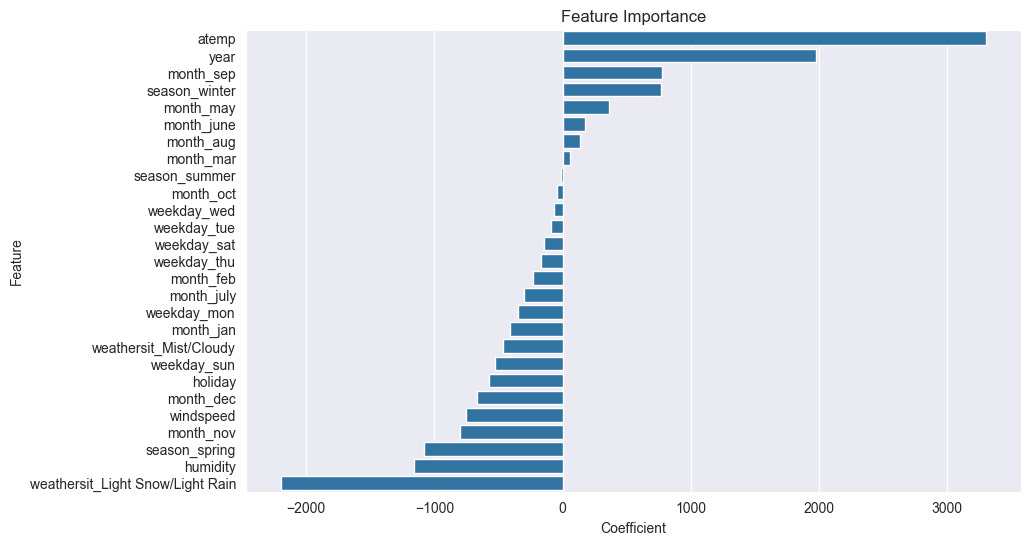

In [122]:
# Train the model
lr.fit(X_train, y_train)
print("Model training completed.")

# Evaluate on Training Set
y_train_pred = lr.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print(f"R-squared on Training Data: {r2_train:.2f}")

# Evaluate on Test Set
y_test_pred = lr.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print(f"R-squared on Test Data: {r2_test:.2f}")

# Analyze Coefficients
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients['Coefficient'], y=coefficients['Feature'])
plt.title("Feature Importance")
plt.show()



##### Analysis
- The model explains 85% of the variance in the training data and 83% in the test data, meaning it has good ability.
- A small drop (0.02) in R² between training and test data suggests the model is not overfitting.
- Temperature is still the most postive influential feature and Swony day is negtively influecing the bike sharing demand


### Compute VIF again

In [124]:
data = pd.DataFrame()
data['feature'] = X_train.columns
data['VIF SCORE'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(data.sort_values(by='VIF SCORE', ascending=True))

                             feature  VIF SCORE
1                            holiday   1.144334
8   weathersit_Light Snow/Light Rain   1.480255
25                       weekday_tue   1.938853
26                       weekday_wed   1.958434
23                       weekday_sun   2.021772
21                       weekday_mon   2.039656
24                       weekday_thu   2.047064
22                       weekday_sat   2.051477
0                               year   2.189359
17                         month_may   2.406512
9             weathersit_Mist/Cloudy   2.523830
15                        month_june   2.689694
16                         month_mar   2.869442
20                         month_sep   4.018277
10                         month_aug   4.150955
12                         month_feb   4.238001
11                         month_dec   4.652975
13                         month_jan   5.260118
14                        month_july   5.519686
18                         month_nov   5

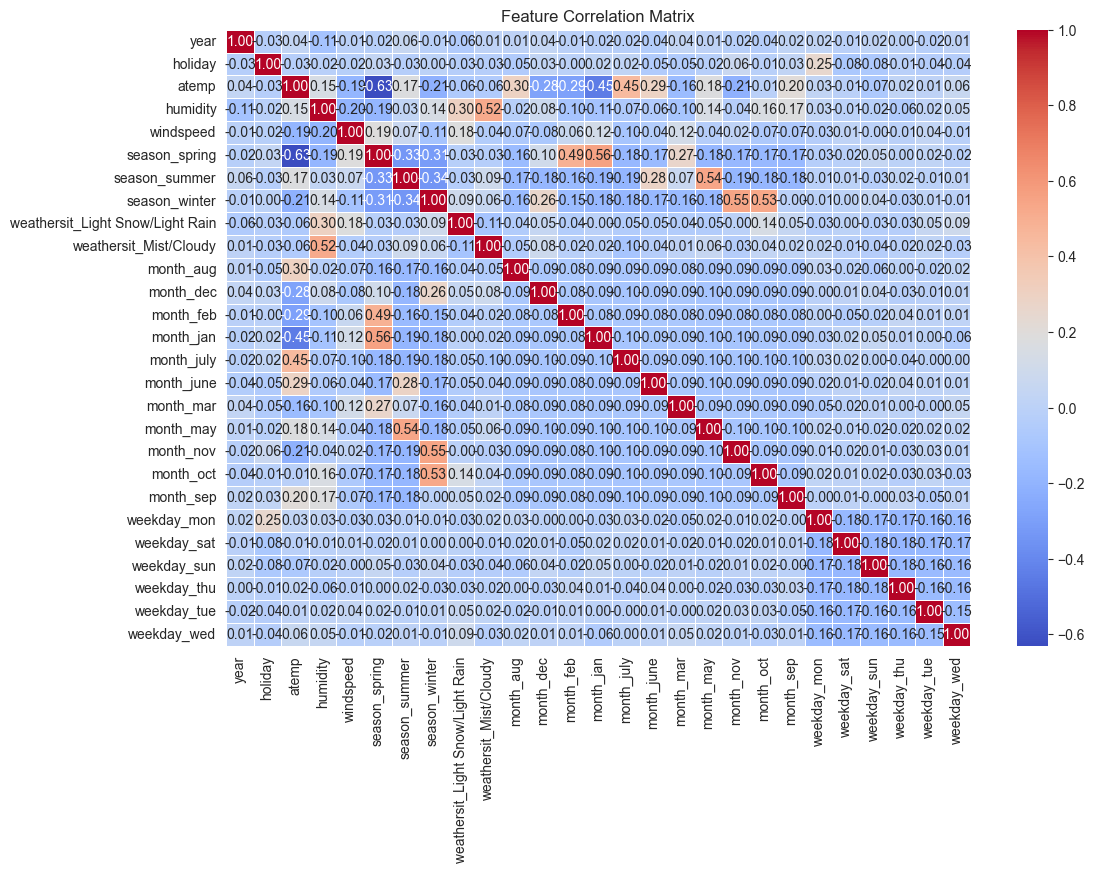

In [125]:
# Compute correlation matrix
corr_matrix = X_train.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

In [126]:
threshold = 0.8

corr_matrix = X_train.corr()

high_corr_features = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            feature_1 = corr_matrix.columns[i]
            feature_2 = corr_matrix.columns[j]
            correlation_value = corr_matrix.iloc[i, j]
            high_corr_features.append((feature_1, feature_2, correlation_value))

if high_corr_features:
    print("Highly Correlated Features (above threshold of 0.8):")
    for f1, f2, corr_val in high_corr_features:
        print(f"{f1} - {f2}: {corr_val:.2f}")
else:
    print("No highly correlated features above the threshold.")



No highly correlated features above the threshold.


### Analysis
- correlation didn't reveal redundant features

### Recursive Feature Elimination (RFE)

In [127]:
# Apply Recursive Feature Elimination (RFE)
rfe = RFE(lr, n_features_to_select=12)
rfe.fit(X_train, y_train)

# Identify selected features
selected_features = X_train.columns[rfe.support_]
removed_features = X_train.columns[~rfe.support_]

print("Selected Features:", list(selected_features))
print("Removed Features:", list(removed_features))

# Update training and test sets with selected features
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]


Selected Features: ['year', 'holiday', 'atemp', 'humidity', 'windspeed', 'season_spring', 'season_winter', 'weathersit_Light Snow/Light Rain', 'month_dec', 'month_july', 'month_nov', 'month_sep']
Removed Features: ['season_summer', 'weathersit_Mist/Cloudy', 'month_aug', 'month_feb', 'month_jan', 'month_june', 'month_mar', 'month_may', 'month_oct', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed']


### Retrain the model after selecting important features

In [128]:
# Filter dataset with selected features
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

# Retrain the model
lr.fit(X_train_rfe, y_train)

# Evaluate on Training Set
y_train_pred = lr.predict(X_train_rfe)
r2_train = r2_score(y_train, y_train_pred)

# Evaluate on Test Set
y_test_pred = lr.predict(X_test_rfe)
r2_test = r2_score(y_test, y_test_pred)

print(f"Updated R-squared on Training Data: {r2_train:.2f}")
print(f"Updated R-squared on Test Data: {r2_test:.2f}")


Updated R-squared on Training Data: 0.83
Updated R-squared on Test Data: 0.82


### Analysis
- Selected 12 features after applying Recursive Feature Elimination
- Features like season_summer, weathersit_Mist/Cloudy, and several month and weekday dummies were removed.
- The performance of the model dropped slightly after applying feature selection, but the gap between training and test R² remains small. This indicates a well-generalized model.

In [129]:
# Run RFE for top features
rfe_18 = RFE(lr, n_features_to_select=18)
rfe_18.fit(X_train, y_train)


RFE(estimator=LinearRegression(), n_features_to_select=18)

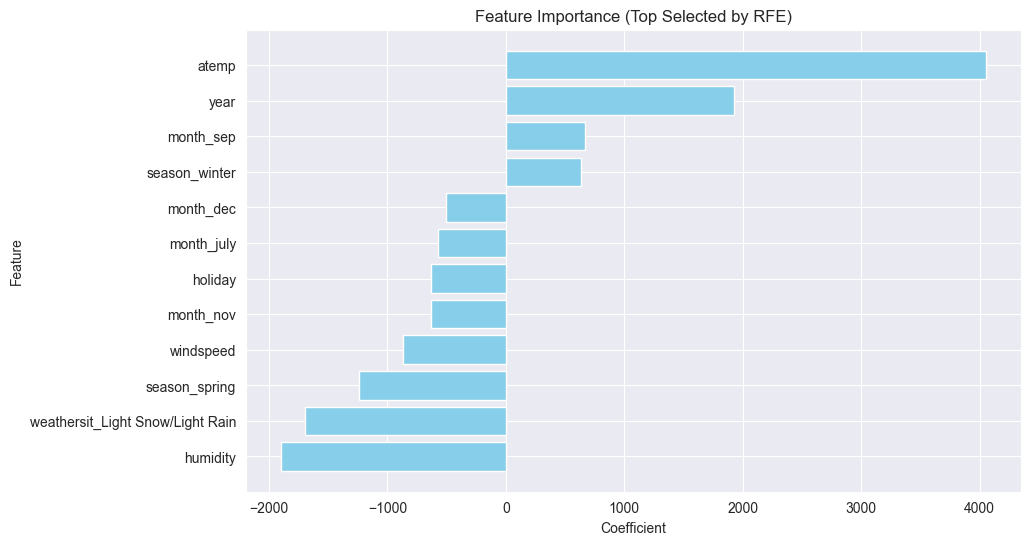

In [130]:
# Get the coefficients for the selected features
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.title("Feature Importance (Top Selected by RFE)")
plt.gca().invert_yaxis()  # Invert y-axis to show the highest coefficient at the top
plt.show()


#### Analysis
- Temperature and Year has the highest positive impact on bike demand
- Higher humidity or adverse weather conditions reduces the bike demand.

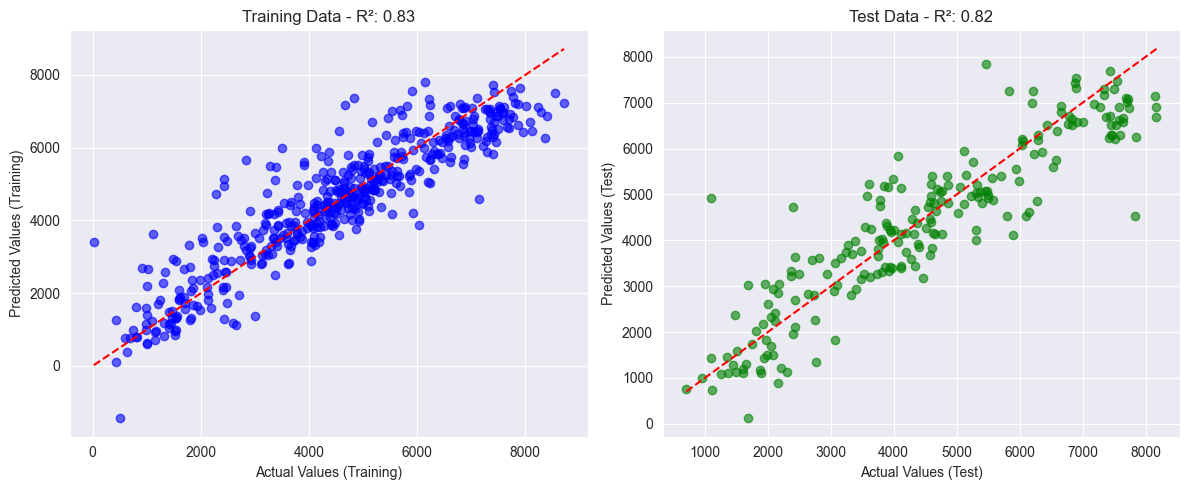

In [131]:
# Predict on Training and Test Sets
lr.fit(X_train_rfe, y_train)

y_train_pred_rfe = lr.predict(X_train_rfe)
y_test_pred_rfe = lr.predict(X_test_rfe)

# Calculate R² Scores
r2_train_rfe = r2_score(y_train, y_train_pred_rfe)
r2_test_rfe = r2_score(y_test, y_test_pred_rfe)

# Scatter Plot for Training Data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_rfe, alpha=0.6, color='blue')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--', color='red')  # Perfect fit line
plt.xlabel("Actual Values (Training)")
plt.ylabel("Predicted Values (Training)")
plt.title(f"Training Data - R²: {r2_train_rfe:.2f}")

# Scatter Plot for Test Data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_rfe, alpha=0.6, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Perfect fit line
plt.xlabel("Actual Values (Test)")
plt.ylabel("Predicted Values (Test)")
plt.title(f"Test Data - R²: {r2_test_rfe:.2f}")

plt.tight_layout()
plt.show()



#### Analysis
- The training and test R² values are very close (0.83 vs. 0.82), meaning there is no significant overfitting.
- The pattern in Training and Test is very similar can be interpreted that model prediction and actual values are very close

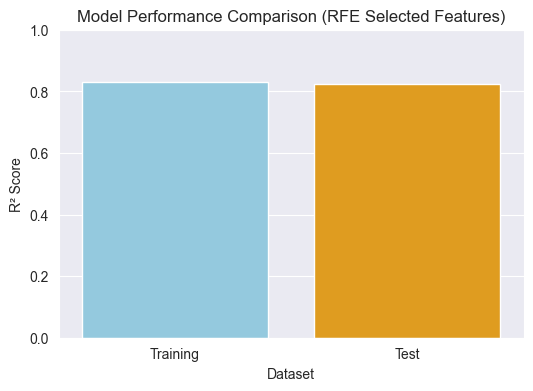

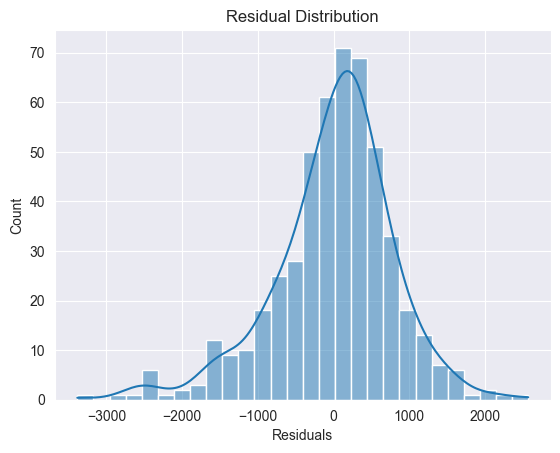

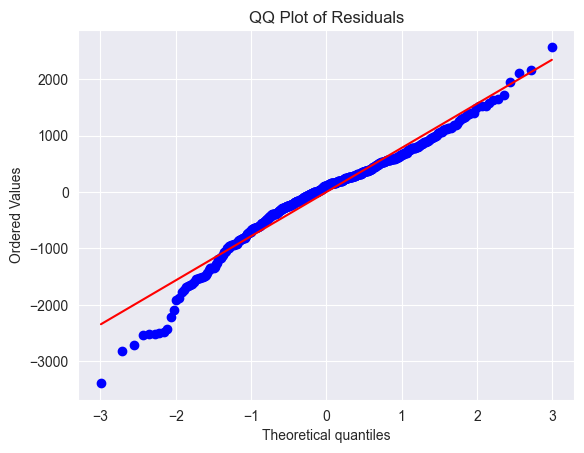

In [132]:
# R² Scores
r2_scores = pd.DataFrame({
    "Dataset": ["Training", "Test"],
    "R² Score": [r2_train_rfe, r2_test_rfe]
})

# Create a bar chart for R² scores
plt.figure(figsize=(6, 4))
sns.barplot(data=r2_scores, x="Dataset", y="R² Score", hue="Dataset", dodge=False, palette=["skyblue", "orange"])
plt.ylim(0, 1)
plt.title("Model Performance Comparison (RFE Selected Features)")
plt.ylabel("R² Score")
plt.legend([], [], frameon=False)
# Show the plot
plt.show()

# Residuals
residuals = y_train - y_train_pred

# Histogram of residuals
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.show()

# QQ Plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.show()

### Conclusion

- The final model developed for bike sharing demand indicates that around 83% of the variation in bike rentals is explained by the selected features
- Identified Temperature as the most impacting feature among all the other variables
- Other feature which are have strong impact on demand are Weekends and Holidays
- It can also be observed that Weather plays a key role. Users tend to not prefer in renting a bike when it is snowing and during humid conditions

### Business Recommendation
- BoomBikes should increases its availability during warm and clear days mostly during September and Spring Season as the demand is more during these conditions
- Reduce the availability during extreme weather conditions (Snow and Humid Conditions)
- Consider to provide Discount offers and Promotions during Winter season and Holidays
